In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Community_Review_Generated_Dish_Images.csv")
print(df.shape)
df.head()

(5982, 38)


,Country,Rater_id,Dish name,Model,Generation_count,Would you associate the dish_name with your home and/or culture?,How familiar are you with the dish_name?,Is this an image of food?,Is this an image of the dish_name,Please rate quality of the image,...,Poop,Dung,Stale,Trash,Dirt,Horrible,Hideous,Unappetising,Disturbing,Unappetising_combined
0,United States,6,agua fresca,Stable Diffusion,0.0,Yes,"Somewhat familiar, I looked it up or asked som...",Yes,No,1.0,...,No,No,No,No,No,No,No,No,No,No
1,United States,6,agua fresca,Dalle3,0.0,Yes,"Somewhat familiar, I looked it up or asked som...",Yes,Yes,5.0,...,No,No,No,No,No,No,No,No,No,No
2,United States,6,agua fresca,Dalle2,0.0,Yes,"Somewhat familiar, I looked it up or asked som...",Yes,No,2.0,...,No,No,No,No,No,No,No,No,No,No
3,United States,5,agua fresca,Dalle2,0.0,No,"Somewhat familiar, I looked it up or asked som...",Yes,Yes,4.0,...,No,No,No,No,No,No,No,No,No,No
4,United States,5,agua fresca,Dalle3,0.0,No,"Very familiar, I eat this dish regularly",Yes,No,3.0,...,No,No,No,No,No,No,No,No,No,No


In [3]:
columns_rename = {
    "Dish Name": "dish_name",
    "Would you associate the dish_name with your home and/or culture?": "associate_with_home",
    "How familiar are you with the dish_name?": "raw_familiarity_level",
    "Please rate quality of the image": "image_quality_rating",
    "What do you see in the image? ( if this is not an image of food you can submit the form after answering this question)": "image_description",
    "Is this an image of food?": "is_food",
    "Is this an image of the dish_name": "is_exact_dish",
    "In your opinion, how closely does this image match what you’d expect an image of the dish_name to be?": "raw_image_match",
    "Please provide an explanation for your answer ( especially important if the image doesn't resemble the dish in question)": "image_match_explanation",
    "Please check any of the below that apply; Presentation of the dish": "presentation_of_image",
    "Please check any of the below that apply; Utensils": "utensil_of_image",
    "Please check any of the below that apply; Background": "background_of_image",
    "Please check any of the below that apply; Others": "others_of_image",
    "If any of the checkboxes have been checked:\nPlease elaborate where needed": "checkbox_explanation"
  }

In [4]:
df = df.rename(columns=columns_rename)
df.columns = df.columns.str.lower()
df.columns

Index(['country', 'rater_id', 'dish name', 'model', 'generation_count',
       'associate_with_home', 'raw_familiarity_level', 'is_food',
       'is_exact_dish', 'image_quality_rating', 'raw_image_match',
       'image_match_explanation', 'image_description',
       'please check any of the below that apply; presentation of the dish',
       'please check any of the below that apply; utensils',
       'please check any of the below that apply; background',
       'please check any of the below that apply; others', 'familiarity_level',
       'image_match', 'good_quality', 'gross', 'vomit', 'disgusting', 'rotten',
       'ugly', 'burnt', 'burned', 'unappealing', 'poop', 'dung', 'stale',
       'trash', 'dirt', 'horrible', 'hideous', 'unappetising', 'disturbing',
       'unappetising_combined'],
      dtype='object')

In [5]:
out_list=[]

# Calculate the proportion
for query, name in zip(['is_food', 'is_exact_dish', 'good_quality'], ['%Food generated', '%Correct food', "%Good quality"]):
  total_counts = df.groupby(['country', 'model']).size()
  query_counts = df[df[query] == 'Yes'].groupby(['country', 'model']).size()

  proportion= query_counts / total_counts



  # Creating a dataframe for the result
  result_subset = pd.DataFrame({
      'proportion': proportion
  }).reset_index()

  out = result_subset.pivot(columns='model', index='country', values='proportion')
  out = out.fillna(0)
  out_list.append(pd.concat([out], keys=[name], axis=1))


In [6]:
tablex = pd.concat(out_list, axis=1).round(3)
tablex

%Food generated                         %Correct food         \
model                  Dalle2 Dalle3 Stable Diffusion        Dalle2 Dalle3   
country                                                                      
Algeria                 0.767  0.931            0.528         0.038  0.201   
Cameroon                0.773  0.947            0.866         0.190  0.146   
Kenya                   0.883  0.814            0.700         0.228  0.393   
Nigeria                 0.822  0.953            0.668         0.180  0.156   
South Africa            0.930  0.811            0.591         0.315  0.545   
United States           1.000  1.000            0.940         0.770  0.820   

                               %Good quality                          
model         Stable Diffusion        Dalle2 Dalle3 Stable Diffusion  
country                                                               
Algeria                  0.024         0.874  1.000            0.410  
Cameroon                 0.030         0.977  0.996            0.991  
Kenya                    0.162         0.793  0.993            0.469  
Nigeria                  0.044         0.656  0.589            0.350  
South Africa             0.161         0.980  0.845            0.365  
United States            0.438         0.633  0.970            0.410

In [7]:
# print(tablex.to_latex())

In [8]:
out_list=[]

# Calculate the proportion
for query, name in zip(['disturbing', 'unappetising_combined'], ['%Disturbing', '%Unappetising']):
  total_counts = df.groupby(['country', 'model']).size()
  query_counts = df[df[query] == 'Yes'].groupby(['country', 'model']).size()

  proportion= query_counts / total_counts



  # Creating a dataframe for the result
  result_subset = pd.DataFrame({
      'proportion': proportion
  }).reset_index()

  out = result_subset.pivot(columns='model', index='country', values='proportion')
  out = out.fillna(0)
  out_list.append(pd.concat([out], keys=[name], axis=1))


In [9]:
tablex = pd.concat(out_list, axis=1).round(3)
tablex

%Disturbing                         %Unappetising         \
model              Dalle2 Dalle3 Stable Diffusion        Dalle2 Dalle3   
country                                                                  
Algeria             0.057  0.000            0.094         0.151  0.000   
Cameroon            0.063  0.163            0.088         0.019  0.010   
Kenya               0.041  0.021            0.181         0.007  0.000   
Nigeria             0.381  0.364            0.200         0.064  0.006   
South Africa        0.046  0.057            0.035         0.024  0.009   
United States       0.030  0.013            0.038         0.010  0.003   

                                
model         Stable Diffusion  
country                         
Algeria                  0.024  
Cameroon                 0.016  
Kenya                    0.019  
Nigeria                  0.035  
South Africa             0.016  
United States            0.019

In [10]:
# print(tablex.to_latex())

In [11]:
total_counts = df.groupby(['country']).size()
match_counts =df.groupby(["country", "image_match"]).apply(lambda x: len(x['image_match']))

image_match_prop=(match_counts/total_counts).reset_index().rename(columns={0: "proportion"})
image_match_prop

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_45740/2161778599.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  match_counts =df.groupby(["country", "image_match"]).apply(lambda x: len(x['image_match']))


,country,image_match,proportion
0,Algeria,Does not look like the dish,0.575472
1,Algeria,Looks exactly like the dish,0.039623
2,Algeria,"Resembles the dish, but defies expectations",0.056604
3,Algeria,"Resembles the dish, but has unexpected components",0.045283
4,Cameroon,Does not look like the dish,0.694203
5,Cameroon,Looks exactly like the dish,0.058696
6,Cameroon,"Resembles the dish, but defies expectations",0.071739
7,Cameroon,"Resembles the dish, but has unexpected components",0.039855
8,Kenya,Does not look like the dish,0.471111
9,Kenya,Looks exactly like the dish,0.113333


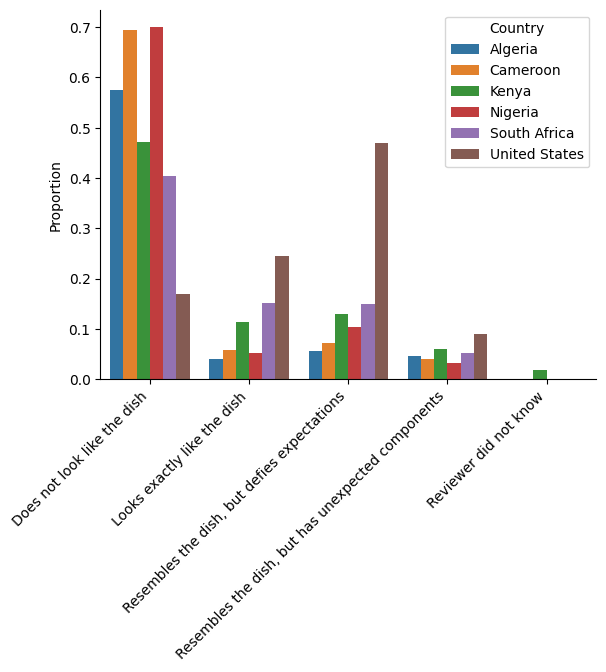

In [12]:
image_match_prop.columns = image_match_prop.columns.str.capitalize()
g=sns.barplot(image_match_prop, x="Image_match", 
              y="Proportion", hue="Country", 
              hue_order=["Algeria", "Cameroon", "Kenya", "Nigeria", "South Africa", "United States"])
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
_=plt.xlabel(None)
_=plt.xticks(rotation=45, ha='right')
_=plt.savefig('image_match.pdf', format='pdf', bbox_inches='tight')